In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ray tracing
from OceanRays import CTDSoundSpeed,RayTrace,plotProfileRaypaths

# run simple ray-path calculations through a theoretical (Munk) sound speed profile
# be careful of low angles when in the sofar channel for obvious reasons (waveguides)
initial_depth = 6000  # meters
max_range = 50e3    # meters (lateral distance)
angles = [-80, -65, -50, -35] # degrees
 
# From CTD Data
infile='CTD_examples/SKQ202409S_009.cnv'
profile, CMac = CTDSoundSpeed(infile)

Profile CTD_examples/SKQ202409S_009.cnv 
   taken at 53.0355, -163.5385
   Date Time 2024-06-28 15:37:10


Calculating travel times to the surface...
  Angle: -80° -> Reached surface at 1025.61 m. Travel Time: 4.04253 seconds.
  Angle: -65° -> Reached surface at 2697.57 m. Travel Time: 4.36902 seconds.
  Angle: -50° -> Reached surface at 4790.91 m. Travel Time: 5.09932 seconds.
  Angle: -35° -> Reached surface at 7884.62 m. Travel Time: 6.58030 seconds.


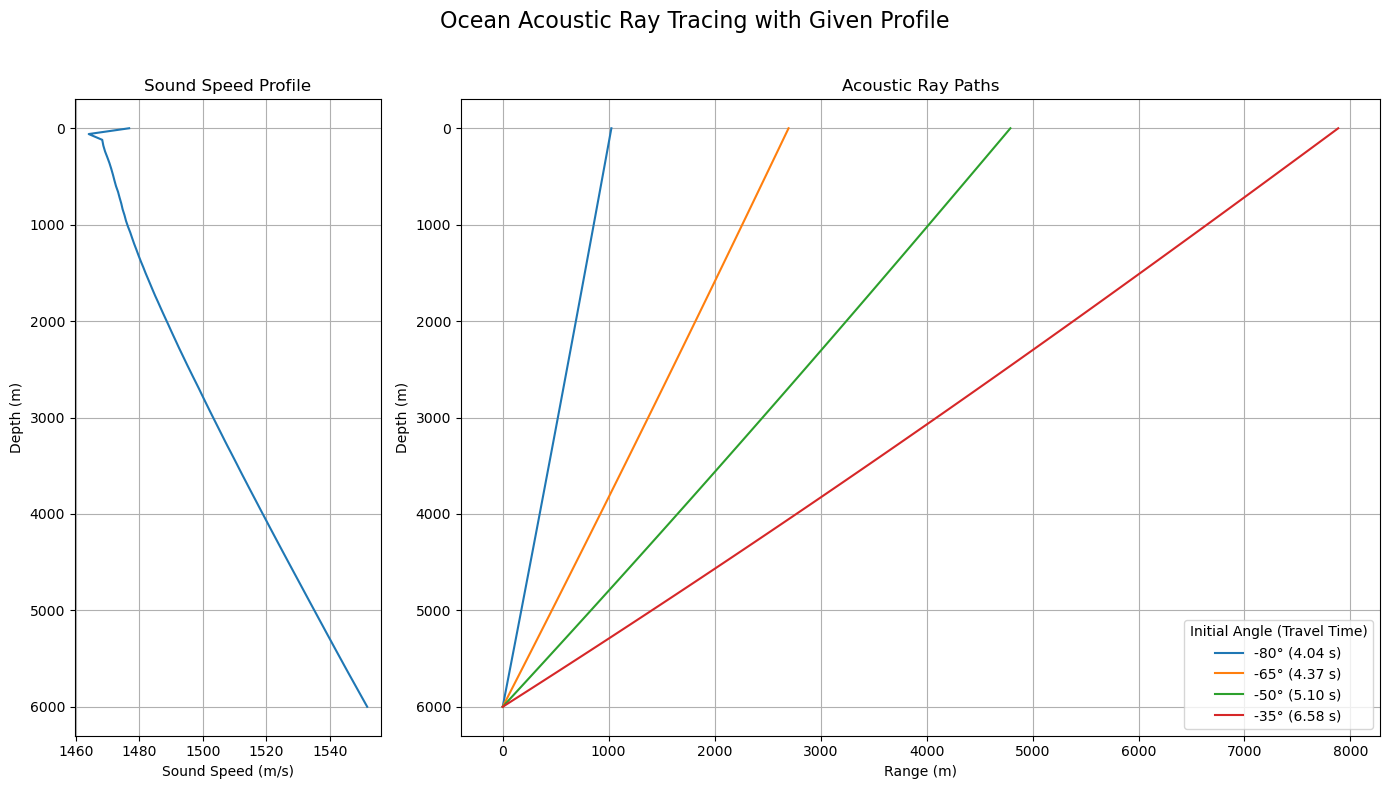

In [2]:
# Run using the Sound Speed calculated
#  from the CTD profile read in above
# --- Run Ray Path Calcs ---
ray_paths = {}
print("Calculating travel times to the surface...")
for angle in angles:
    # If zProfile and cProfile are provided, use then, otherwise use Munk model
    ranges, depths, travel_time = RayTrace(angle, max_range, initial_depth,zProfile=profile['DEPTH'],cProfile=CMac)
    ray_paths[angle] = ((ranges, depths), travel_time)
    if travel_time is not None:
        surface_range = ranges[-1]
        print(f"  Angle: {angle:}° -> Reached surface at {surface_range:.2f} m. Travel Time: {travel_time:.5f} seconds.")
    else:
        print(f"  Angle: {angle:}° -> Did not reach the surface within {max_range} km.")

# --- Plotting ---
depth_grid = np.linspace(0, initial_depth, 101)  # linearly spaced points across depth for plotting sound speed profile
plotProfileRaypaths(ray_paths, zProfile=profile['DEPTH'],cProfile=CMac, sspDepths=depth_grid) # again use CTD profiles

Calculating travel times to the surface...
  Angle: -15° -> Reached surface at 5865.83 m. Travel Time: 3.99460 seconds.
  Angle: -10° -> Reached surface at 293451.81 m. Travel Time: 195.18863 seconds.
  Angle: 10° -> Reached surface at 342681.33 m. Travel Time: 227.88425 seconds.
  Angle: 15° -> Reached surface at 71598.88 m. Travel Time: 47.41874 seconds.


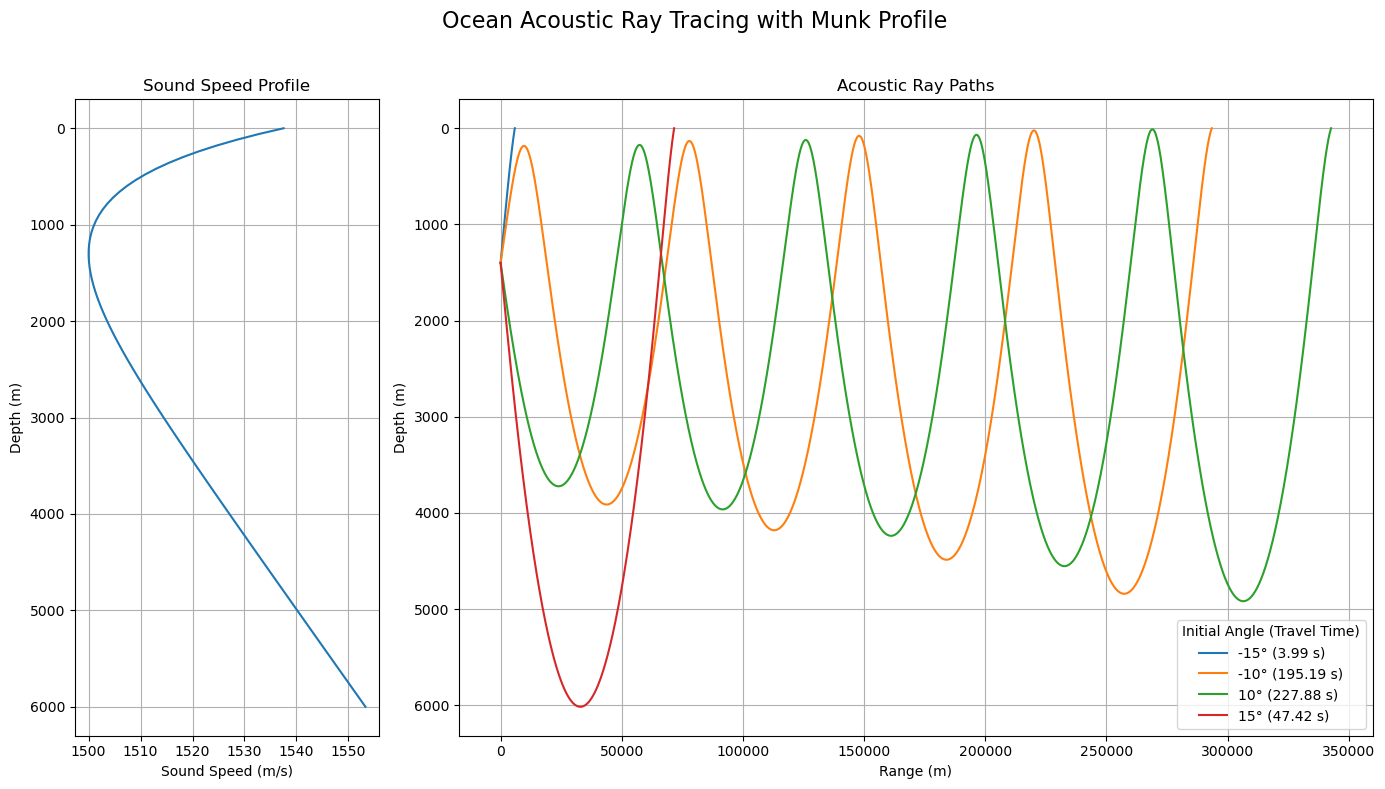

In [3]:
# Low-angle SoFAR tests for fun
initial_depth = 1400  # meters
max_range = 50e3    # meters (lateral distance)
angles = [-15, -10, 10, 15] # degrees

# --- Run Simulated version with Munk model ---
ray_paths = {}
print("Calculating travel times to the surface...")
for angle in angles:
    ranges, depths, travel_time = RayTrace(angle, max_range, initial_depth)
    ray_paths[angle] = ((ranges, depths), travel_time)
    if travel_time is not None:
        surface_range = ranges[-1]
        print(f"  Angle: {angle:}° -> Reached surface at {surface_range:.2f} m. Travel Time: {travel_time:.5f} seconds.")
    else:
        print(f"  Angle: {angle:}° -> Did not reach the surface within {max_range} km.")

# --- Plotting ---
depth_grid = np.linspace(0, 6000, 101)  # linearly spaced points across depth for plotting sound speed profile
plotProfileRaypaths(ray_paths, sspDepths=depth_grid)

## Testing plots of CTD profile
can ignore

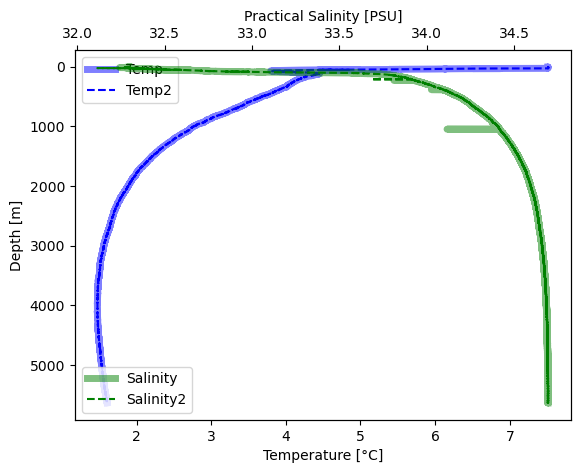

In [4]:
plt.plot(profile['TEMP'],profile['DEPTH'], 'b', alpha=0.5,linewidth=5, label='Temp')
plt.plot(profile['TEMP2'],profile['DEPTH'], 'b--', label='Temp2')
plt.legend()
plt.xlabel('Temperature [°C]')
plt.ylabel('Depth [m]')

plt.twiny()
plt.plot(profile['PSAL'],profile['DEPTH'], 'g',alpha=0.5,linewidth=5, label='Salinity')
plt.plot(profile['PSAL2'],profile['DEPTH'], 'g--', label='Salinity2')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('Practical Salinity [PSU]')
plt.show()


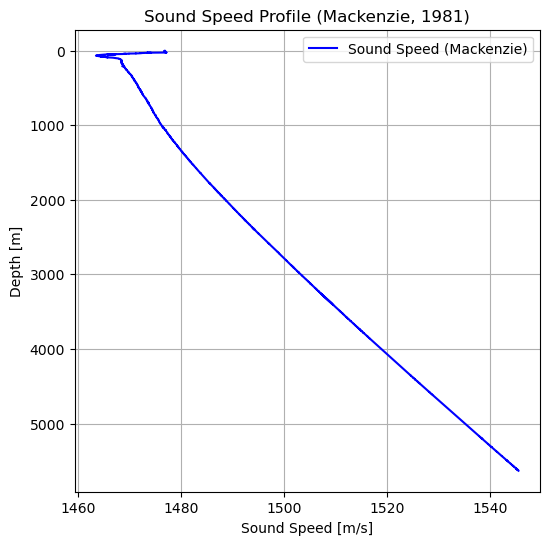

In [5]:

plt.figure(figsize=(6,6))
plt.plot(CMac, profile['DEPTH'], 'b', label='Sound Speed (Mackenzie)')
plt.gca().invert_yaxis()
plt.xlabel('Sound Speed [m/s]')
plt.ylabel('Depth [m]')
plt.title('Sound Speed Profile (Mackenzie, 1981)')
plt.legend()
plt.grid(True)
plt.show()